<a href="https://colab.research.google.com/github/VincentCsNv/SPARKS/blob/main/Classification_CIFAR/classif_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision --quiet
!pip install sympy==1.13.1 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.6 MB/s eta 0:00:00


In [ ]:
#Visualization of preds
#Test the transform functions
#review training
#test

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision.datasets import CIFAR100
import torchvision.transforms as tt
import torch.nn as nn
from tqdm import tqdm
import seaborn as sns



In [ ]:
super_classes_dict = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
'household electrical device': ['clock', 'computer_keyboard', 'lamp', 'telephone', 'television'],
'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
'people': ['baby', 'boy', 'girl', 'man', 'woman'],
'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

In [ ]:
super_class_selected = ["aquatic mammals","household furniture","trees"]

#training parameters
batch_size = 16

# 1. Prepare the dataset (CIFAR 100) :

In [ ]:
#Useful functions :
def getting_classes_selected(superclass_selected,superclass_dict):
  classes_selected = []
  for superclass in super_class_selected:
    classes_selected = classes_selected + super_classes_dict[superclass]
  return classes_selected

def get_idx_classes(class_selected,data):
  return data.class_to_idx[class_selected]


def show_img(sub_data,data):
  plt.figure(figsize=(10, 10))
  rd_img = np.random.randint(0, len(sub_data),25)

  for i in range(25):
      idx = rd_img[i]
      plt.subplot(5, 5, i + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      img = sub_data[idx][0].permute(1, 2, 0) #permute columns to have the great order.
      img=img*0.5 +0.5 #We denormalize the img
      plt.imshow(img)
      plt.title(data.classes[sub_data[idx][1]])


In [ ]:
#data augmentation

#Random transformation for the training (data Augmentation)
train_transform = tt.Compose(
    [tt.RandomHorizontalFlip(),
     tt.ToTensor(),
     tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#For the test we want to avoid random layer, to keep relevant results
test_transform = tt.Compose(
    [tt.ToTensor(),
     tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # permet d'avoir des valeurs de -1 à 1 meilleurs pour le réseau de neuronnes.


In [ ]:
# Load CIFAR dataset
#Load dataframe
train_data = CIFAR100(root="data",download = True, transform = train_transform) #Adding Data Augmentation with transform
test_data = CIFAR100(root="data",train = False,download = True, transform = test_transform) #Adding Data Augmentation with transform

#Filtrate the dataset to conserve only selected classes
#getting idx of classes selected
classes_selected = getting_classes_selected(super_class_selected,super_classes_dict)
classes_selected_idx = [get_idx_classes(class_name, train_data) for class_name in classes_selected]

#Getting idx of selected images
img_select_idx = np.where(np.isin(np.array(train_data.targets),classes_selected_idx))[0]
img_test_select_idx = np.where(np.isin(np.array(test_data.targets),classes_selected_idx))[0]

#Create subset of the dataset with only the classes required.
trainset = torch.utils.data.Subset(train_data, img_select_idx)
testset = torch.utils.data.Subset(test_data, img_test_select_idx)
print(f"nb of training images {len(trainset)}, nb of test images {len(testset)}")

100%|██████████| 169M/169M [00:06<00:00, 25.4MB/s]


nb of training images 7500, nb of test images 1500


In [ ]:
#Creation of a equivalence dataframe the aim is to associated the label to the right class, as we study at the level of superclass
train_data.classes
eq_df = pd.DataFrame(columns=['class','label'])
eq_df['class'] = classes_selected
eq_df['label'] = [train_data.class_to_idx[class_name] for class_name in classes_selected]

#Getting association to the super-classes:
superc_class_df =  pd.DataFrame([
    {'class': class_name, 'superclass': super_class}
    for super_class, classes in super_classes_dict.items()
    for class_name in classes
])
eq_df = eq_df.merge(superc_class_df, on='class', how="left")

#Adding labels according to superclass
eq_df["label_A"] = eq_df["superclass"].apply(lambda superclass : super_class_selected.index(superclass) )
eq_df["label_B"] = np.arange(len(eq_df))

#Showing what we got
eq_df.head(3)


,class,label,superclass,label_A,label_B
0,beaver,4,aquatic mammals,0,0
1,dolphin,30,aquatic mammals,0,1
2,otter,55,aquatic mammals,0,2


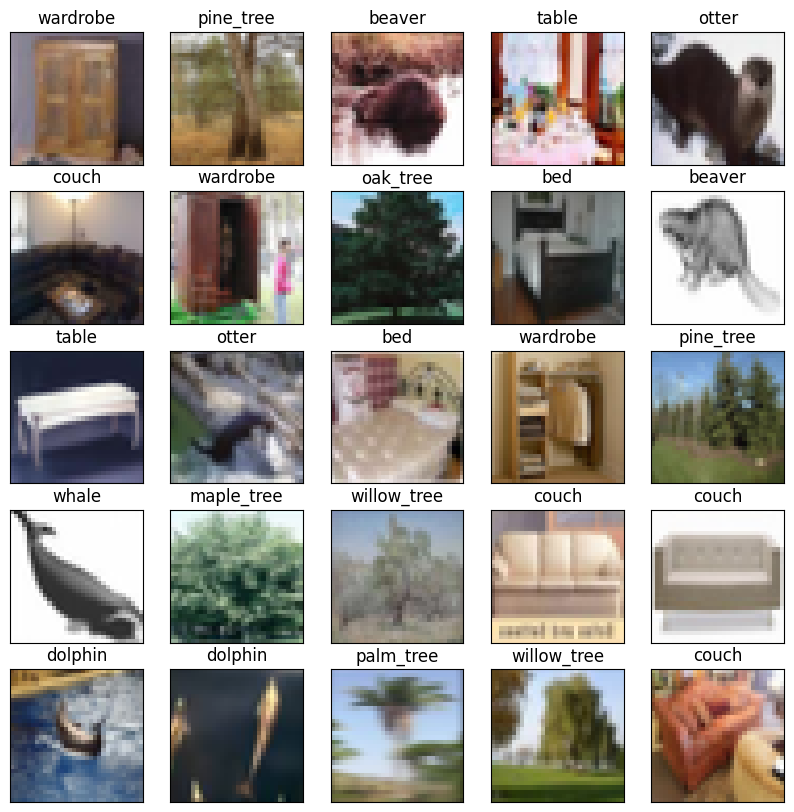

In [ ]:
# #Observe the dataset
show_img(trainset,train_data)

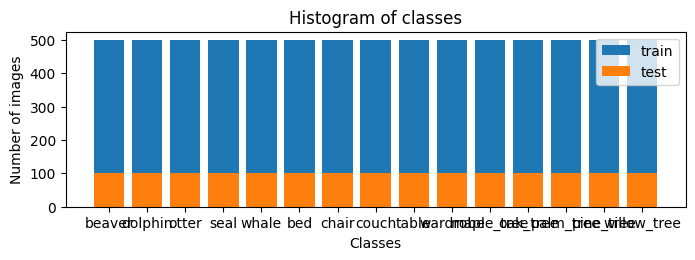

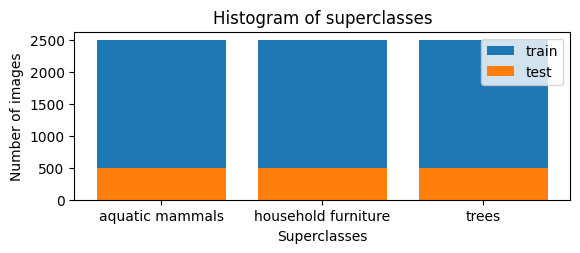

In [ ]:
# ADD HISTOGRAM FOR THE REPARTITION IN EACH CLASS
train_class = np.zeros(len(classes_selected))
train_superclass = np.zeros(len(super_class_selected))
for data,label in trainset:
  label_idx = classes_selected_idx.index(label)
  label_superclass = eq_df[eq_df["label"]== label]["label_A"].values[0]
  train_class[label_idx]+=1
  train_superclass[label_superclass]+=1

test_class = np.zeros(len(classes_selected))
test_superclass = np.zeros(len(super_class_selected))
for data,label in testset:
  label_idx = classes_selected_idx.index(label)
  label_superclass = eq_df[eq_df["label"]== label]["label_A"].values[0]
  test_class[label_idx]+=1
  test_superclass[label_superclass]+=1

#plot histogram repartition by classes
plt.figure(figsize=(8, 5))
plt.subplot(2,1,1)
plt.bar(classes_selected, train_class, label='train')
plt.bar(classes_selected, test_class, label='test')
plt.title('Histogram of classes')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.legend()
plt.show()

#plot histogram repartition by superclasses
plt.subplot(2,1,2)
plt.bar(super_class_selected, train_superclass, label='train')
plt.bar(super_class_selected, test_superclass, label='test')
plt.title('Histogram of superclasses')
plt.xlabel('Superclasses')
plt.ylabel('Number of images')
plt.legend()
plt.show()

# 2. Training models :

## A. Classification in super-classes :

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

### a. Define models :

In [ ]:
#model pre-trained
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#Model create layer by layer
class convnet_no_dropout(nn.Module):
    # Constructor
    def __init__(self):
        super(convnet_no_dropout, self).__init__()
        '''
         Convolutional layers
         Conv2d (input channels, output channels, kernel_size, padding)

        Each Sequential layer has :
              1. A Convolutional Layer
              2. Relu activation function
              3. Maxpool layer
        '''

        self.conv_layer_1 = torch.nn.Sequential(
            # Convoolutional layer
            nn.Conv2d(in_channels=3, out_channels=16,kernel_size= 3,stride=1, padding=1),

            # Activation function
            nn.ReLU(),

            # Max pooling layer
            torch.nn.MaxPool2d(kernel_size=2)
        )

        self.conv_layer_2 = torch.nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32,kernel_size= 3,stride=1, padding=1),
            nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2)
        )


        self.conv_layer_3 = torch.nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64,kernel_size= 3,stride=1, padding=1),
            nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2)
        )
        self.conv_layer_4 = torch.nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128,kernel_size= 3,stride=1, padding=1),
            nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2)
        )


        # Fully Connected layers
        self.hidden_layer = nn.Linear(128*2*2, 206)
        self.output_layer = nn.Linear(206, len(super_class_selected))

    def forward(self, ip):

        # Calling all the convolutional layers
        output = self.conv_layer_1(ip)
        output = self.conv_layer_2(output)
        output = self.conv_layer_3(output)
        output = self.conv_layer_4(output)

        # Flattening
        output = output.view(-1, 128*2*2)

        # Call fully connected layer
        output = self.hidden_layer(output)

        output=self.output_layer(output)

        return output

model1 = convnet_no_dropout()

## B. Training epoch per epoch:

In [ ]:
def convert_labels(labels,eq_df,mode="A"):
  labels_list = labels.tolist()
  #new_labels = [label for label in labels_list]

  new_labels = [eq_df[eq_df["label"]== label][f"label_{mode}"].values[0] for label in labels_list]
  new_labels_tensor = torch.tensor(new_labels)
  return new_labels_tensor

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))


def evaluate(model,valid_dl,loss_func,mode = "A"):
    model.eval()
    batch_losses, batch_accs=[],[]
    for images,labels in valid_dl:
        labels = convert_labels(labels,eq_df,mode=mode)
        predicted=model(images)
        batch_losses.append(loss_func(predicted,labels))
        batch_accs.append(accuracy(predicted,labels))
    epoch_avg_loss=torch.stack(batch_losses).mean().item()# To keep only the mean
    epoch_avg_acc=torch.stack(batch_accs).mean().item()
    return epoch_avg_loss,epoch_avg_acc

def train(model,train_dl,valid_dl,epochs, max_lr, loss_func,optim,eq_df,mode="A"):

    '''
    Optimizer
    '''
    #optimizer=optim(model1.parameters(), max_lr) #Normal opti
    #optimizer=optim(model1.parameters(), max_lr,weight_decay=1e-5) #L2Norm Opti
    optimizer=optim(model.parameters(), max_lr, momentum=0.9,weight_decay=1e-5) # Opti for SGD

    '''
    Learning Rate Scheduler
    '''
    scheduler=torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr,epochs*len(train_dl)) #VOIR CE QUE CEST EN SOIT
#     scheduler=torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=5,verbose=True)
#     scheduler=torch.optim.lr_scheduler.ExponentialLR(optimizer,  gamma=0.9)

    results=[]
    for epoch in range(epochs):
        model.train()
        train_losses, train_batch_accs, lrs =[],[],[]

        for images, labels in train_dl:
          labels = convert_labels(labels,eq_df,mode=mode) # Adapt to the classes (Option A or B)
          optimizer.zero_grad() #What bizarre de l'avoir ici plutot au dessus ..
          predicted=model(images)
          loss=loss_func(predicted,labels)
          train_losses.append(loss)
          loss.backward() #Backpropagation verify what it is
          optimizer.step() # Compute the optimization of the gradient descent.
          optimizer.zero_grad() #What bizarre de l'avoir ici plutot au dessus ..

          # keep track of learning rate
          lrs.append(optimizer.param_groups[0]['lr'])
          train_batch_accs.append(accuracy(predicted,labels))
        scheduler.step() #Will change the lr ?
        epoch_train_acc=torch.stack(train_batch_accs).mean().item()
        epoch_train_loss=torch.stack(train_losses).mean().item()
        epoch_avg_loss,epoch_avg_acc=evaluate(model,valid_dl,loss_func) #having the avg metrics for the epoch.

        results.append({'avg_valid_loss': epoch_avg_loss,
                        'avg_val_acc': epoch_avg_acc,
                        'avg_train_loss':epoch_train_loss,
                        'avg_train_acc':epoch_train_acc,
                        'lrs':lrs})

        print('Number of epochs:', epoch,'|',
              'Validation loss :',epoch_avg_loss, ' |','Training loss :'
              ,epoch_train_loss,' |  '
              ,'Training accuracy:', epoch_train_acc
              , 'validation accuracy :',epoch_avg_acc)
        #Save the model weight
        torch.save(model.state_dict(), 'model_weights.pth')
    return results






In [ ]:

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))
#test the accuracy function
preds = [[0.3,-0.1,-0.1],[0.3,0.1,-0.1],[-0.3,0.1,-0.1]]
labels = [0,1,1]
preds = torch.tensor(preds)
labels = torch.tensor(labels)
accuracy(preds,labels)

tensor(0.6667)

In [ ]:
epochs = 5
loss_func=nn.functional.cross_entropy

'''
Optimizers
'''
#optim=torch.optim.Adam
optim=torch.optim.SGD

'''
Train function call
'''
max_lr1 = 1e-2
results= train(model1,trainloader,testloader,epochs, max_lr1, loss_func,optim,eq_df)

Number of epochs: 0 | Validation loss : 0.32586127519607544  | Training loss : 0.2737884521484375  |   Training accuracy: 0.8951225876808167 validation accuracy : 0.8721187710762024
Number of epochs: 1 | Validation loss : 0.30128365755081177  | Training loss : 0.2829758822917938  |   Training accuracy: 0.8953891396522522 validation accuracy : 0.8880761861801147
Number of epochs: 2 | Validation loss : 0.39516788721084595  | Training loss : 0.2536676526069641  |   Training accuracy: 0.904628574848175 validation accuracy : 0.8419770002365112
Number of epochs: 3 | Validation loss : 0.3048270344734192  | Training loss : 0.24923908710479736  |   Training accuracy: 0.9059612154960632 validation accuracy : 0.8785461187362671
Number of epochs: 4 | Validation loss : 0.28876993060112  | Training loss : 0.2370309680700302  |   Training accuracy: 0.9106699228286743 validation accuracy : 0.888741135597229


In [ ]:
'''
Training Accuracy
'''
avg_training_accuracy1=[]
for result in results:
    avg_training_accuracy1.append(result['avg_train_acc'])

'''
Validation Accuracy
'''
avg_validation_accuracy1=[]
for result in results:
    avg_validation_accuracy1.append(result['avg_val_acc'])
'''
Validation Loss
'''
avg_validation_loss1=[]
for result in results:
    avg_validation_loss1.append(result['avg_valid_loss'])
'''
Training Loss
'''
avg_training_loss1=[]
for result in results:
    avg_training_loss1.append(result['avg_train_loss'])

'''
Epochs count
'''
epoch_count=[]
for i in range(epochs):
    epoch_count.append(i)

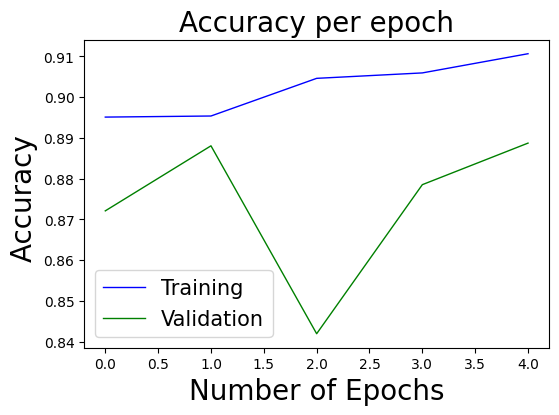

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(epoch_count,avg_training_accuracy1, 'blue', label = "Training", linewidth = '1')
plt.plot(epoch_count,avg_validation_accuracy1, 'green', label = "Validation", linewidth = '1')
plt.title("Accuracy per epoch",fontsize=20)
plt.xlabel("Number of Epochs",fontsize=20)
plt.ylabel("Accuracy ",fontsize=20)
plt.legend(fontsize=15)
plt.show()

#. Evaluate models:

In [ ]:
#On charge les poids du modèle.
model_eval = convnet_no_dropout()
model_eval.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [ ]:
#Eval the model on the test dataset (Metrics + Confusion Matrix)
model_eval.eval()
batch_losses, batch_accs=[],[]
all_predictions, all_labels = [], []  # Pour la matrice de confusion
i=0
while i<3:
  for images,labels in testloader:
    labels = convert_labels(labels,eq_df,mode="A")
    predicted=model_eval(images)
    batch_losses.append(loss_func(predicted,labels))
    batch_accs.append(accuracy(predicted,labels))

    # Collecter pour matrice de confusion
    _, pred_classes = torch.max(predicted, 1)  # Classes prédites
    all_predictions.extend(pred_classes.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())
    i+=1

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       500
           1       0.92      0.84      0.88       500
           2       0.95      0.88      0.91       500

    accuracy                           0.89      1500
   macro avg       0.90      0.89      0.89      1500
weighted avg       0.90      0.89      0.89      1500



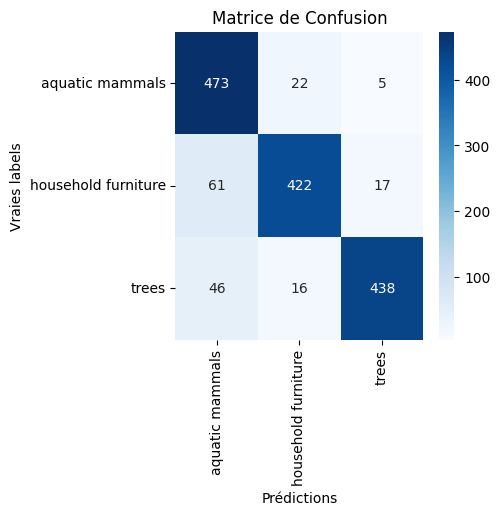

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Créer la matrice de confusion
cm = confusion_matrix(all_labels, all_predictions)
print(classification_report(all_labels, all_predictions))

# Plot de la matrice de confusion
class_names = super_class_selected
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.title('Matrice de Confusion')
plt.ylabel('Vraies labels')
plt.xlabel('Prédictions')
plt.show()

4
ground thruth: ['aquatic mammals'], pred :aquatic mammals 


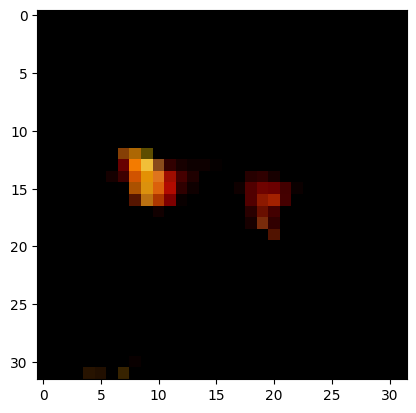

In [ ]:
def predict_img(img,model):
  yb = model(img)
  _, pred = torch.max(yb, dim=1)
  pred = pred.item()
  return pred

i = np.random.randint(0, len(trainset))
img,label = trainset[i]
pred = predict_img(img,model_eval)
print(label)
truth = eq_df[eq_df["label"]==label]["superclass"].values
pred_name = eq_df[eq_df["label_A"]==pred]["superclass"].values[0]
print(f"ground thruth: {truth}, pred :{pred_name} ")
plt.imshow(img.permute(1, 2, 0))


In [ ]:
#FUNCTIONS TO SHOW SOME PREDS.

array([], dtype=object)